## **Importing the nessassary Libraries**
- we want to process the csv file and preprocess the data for anime recommendation system and want to apply one hot encoding to the genre column.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Define the file path
file_path = '/content/drive/My Drive/anime_final.csv'

ValueError: mount failed

## **Reading the data**

In [ ]:
with open(file_path, 'r') as file:
    for _ in range(5):
        print(file.readline())

anime_id|name|type|episodes|mal_score|members|studio|release-season|release-year|release-date|source-material|genres|themes|demographics|synopsis|image_url|rating|va_list|staff_list|recommended_review_count|mixedfeelings_review_count|notrecommended_review_count

32281|Kimi no Na wa.|Movie|1|9.37|200630|['CoMix Wave Films']|summer|2016.0||Original|['Award Winning', 'Drama', 'Supernatural']|[]||Mitsuha Miyamizu, a high school girl, yearns to live the life of a boy in the bustling city of Tokyo—a dream that stands in stark contrast to her present life in the countryside. Meanwhile in the city, Taki Tachibana lives a busy life as a high school student while juggling his part-time job and hopes for a future in architecture.    One day, Mitsuha awakens in a room that is not her own and suddenly finds herself living the dream life in Tokyo—but in Taki's body! Elsewhere, Taki finds himself living Mitsuha's life in the humble countryside. In pursuit of an answer to this strange phenomenon, they

## **Loading the data**

In [ ]:
# delimiter is '|'
anime_df = pd.read_csv(file_path, delimiter='|', on_bad_lines='skip')

## **Columns in the data**

In [ ]:
anime_df.columns

Index(['anime_id', 'name', 'type', 'episodes', 'mal_score', 'members',
       'studio', 'release-season', 'release-year', 'release-date',
       'source-material', 'genres', 'themes', 'demographics', 'synopsis',
       'image_url', 'rating', 'va_list', 'staff_list',
       'recommended_review_count', 'mixedfeelings_review_count',
       'notrecommended_review_count'],
      dtype='object')

In [ ]:
# # Define the file path
# file_path1 = '/content/drive/My Drive/anime_final_image-embeddings.csv'

# with open(file_path1, 'r') as file:
#     for _ in range(5):
#         print(file.readline())

# anime_df_emb = pd.read_csv(file_path1, delimiter='|', on_bad_lines='skip')

|anime_id|name|type|episodes|mal_score|members|studio|release-season|release-year|release-date|source-material|genres|themes|demographics|synopsis|image_url|rating|va_list|staff_list|recommended_review_count|mixedfeelings_review_count|notrecommended_review_count|image_features

0|32281|Kimi no Na wa.|Movie|1|9.37|200630|['CoMix Wave Films']|summer|2016.0||Original|['Award Winning', 'Drama', 'Supernatural']|[]||Mitsuha Miyamizu, a high school girl, yearns to live the life of a boy in the bustling city of Tokyo—a dream that stands in stark contrast to her present life in the countryside. Meanwhile in the city, Taki Tachibana lives a busy life as a high school student while juggling his part-time job and hopes for a future in architecture.    One day, Mitsuha awakens in a room that is not her own and suddenly finds herself living the dream life in Tokyo—but in Taki's body! Elsewhere, Taki finds himself living Mitsuha's life in the humble countryside. In pursuit of an answer to this strang

## **Dataset**

In [ ]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12226 entries, 0 to 12225
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   anime_id                     12226 non-null  int64  
 1   name                         12226 non-null  object 
 2   type                         12201 non-null  object 
 3   episodes                     12226 non-null  object 
 4   mal_score                    11996 non-null  float64
 5   members                      12226 non-null  int64  
 6   studio                       10747 non-null  object 
 7   release-season               10747 non-null  object 
 8   release-year                 10747 non-null  float64
 9   release-date                 0 non-null      float64
 10  source-material              8527 non-null   object 
 11  genres                       10747 non-null  object 
 12  themes                       10747 non-null  object 
 13  demographics    

Load Data for rating Df

In [ ]:
with open('rating_ken.csv', 'r') as file:
    for _ in range(5):
        print(file.readline())

# delimiter is '|'
rating_df = pd.read_csv('rating_ken.csv', delimiter='|', on_bad_lines='skip')

user_id|anime_id|rating

1|20|-1

1|24|-1

1|79|-1

1|226|-1



In [ ]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7807795 entries, 0 to 7807794
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.7 MB


<Figure size 1000x600 with 0 Axes>

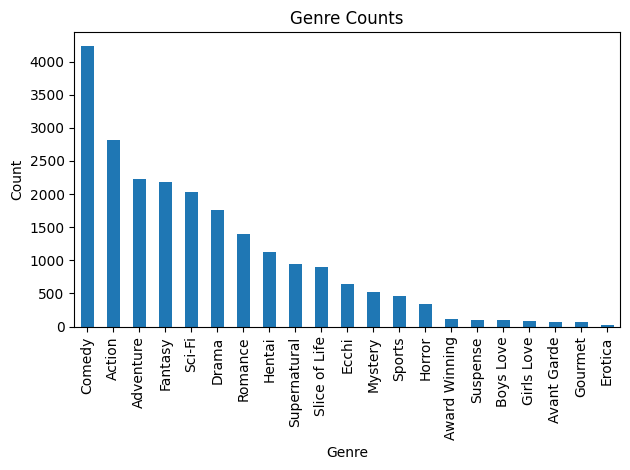

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if necessary
genre_counts_df.plot(kind='bar', legend=None)
plt.title('Genre Counts')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

One Hot Encode Genre

In [ ]:
import ast
import pandas as pd
anime_df1=anime_df

# Separate rows with null genres
null_genres_df = anime_df1[anime_df1['genres'].isnull()]

# Drop rows with missing values in the 'genres' column
anime_df_non_null = anime_df1.dropna(subset=['genres'])

# Convert genre strings to lists
anime_df_non_null["genres"] = anime_df_non_null["genres"].apply(ast.literal_eval)

# Extract the list of unique genres
unique_genres = set(genre for sublist in anime_df_non_null["genres"] for genre in sublist)

# Create new columns in the DataFrame for each genre and populate them
for genre in unique_genres:
    anime_df_non_null[f'genre-{genre}'] = anime_df_non_null["genres"].apply(lambda x: 1 if genre in x else 0)

# Add the new columns to the null_genres_df with 0 values
for genre in unique_genres:
    null_genres_df[f'genre-{genre}'] = 0

# Combine the DataFrames back together
anime_df_genre = pd.concat([anime_df_non_null, null_genres_df], ignore_index=True)


<ipython-input-9-b7af930f4990>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_df_non_null["genres"] = anime_df_non_null["genres"].apply(ast.literal_eval)
<ipython-input-9-b7af930f4990>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_df_non_null[f'genre-{genre}'] = anime_df_non_null["genres"].apply(lambda x: 1 if genre in x else 0)
<ipython-input-9-b7af930f4990>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [ ]:
anime_df_genre.head()

,anime_id,name,type,episodes,mal_score,members,studio,release-season,release-year,release-date,...,genre-Supernatural,genre-Ecchi,genre-Mystery,genre-Horror,genre-Fantasy,genre-Sports,genre-Gourmet,genre-Action,genre-Slice of Life,genre-Sci-Fi
0,32281,Kimi no Na wa.,Movie,1,9.37,200630,['CoMix Wave Films'],summer,2016.0,NaN,...,1,0,0,0,0,0,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,TV,64,9.26,793665,['Bones'],spring,2009.0,NaN,...,0,0,0,0,1,0,0,1,0,0
2,28977,Gintama°,TV,51,9.25,114262,['Bandai Namco Pictures'],spring,2015.0,NaN,...,0,0,0,0,0,0,0,1,0,1
3,9253,Steins;Gate,TV,24,9.17,673572,['White Fox'],spring,2011.0,NaN,...,0,0,0,0,0,0,0,0,0,1
4,9969,Gintama&#039;,TV,51,9.16,151266,['Sunrise'],spring,2011.0,NaN,...,0,0,0,0,0,0,0,1,0,1


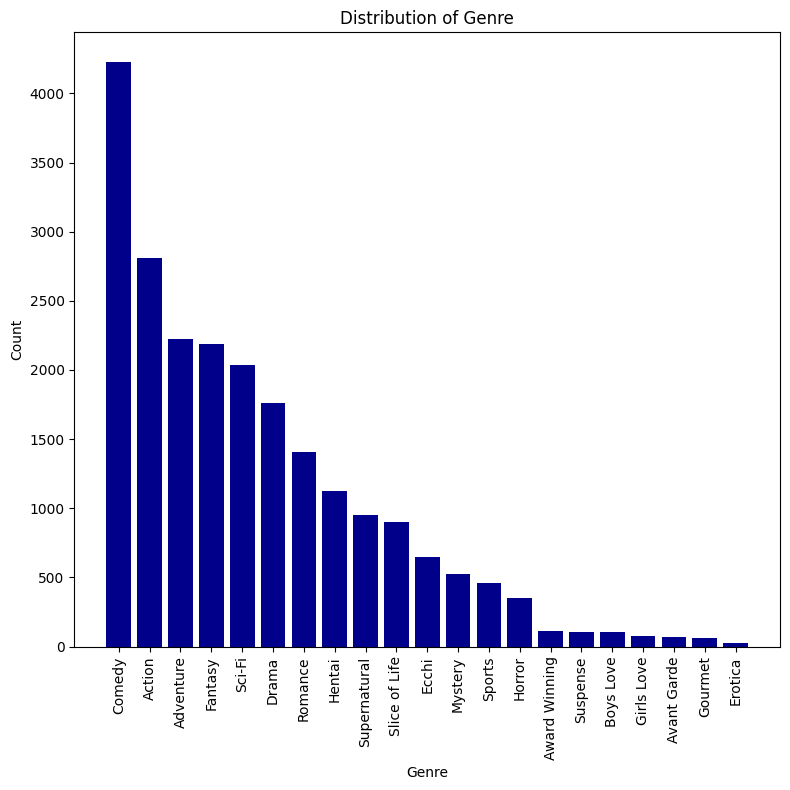

NameError: name 'anime_df_genres' is not defined

In [ ]:
all_genres = [genre for sublist in anime_df_non_null["genres"] if sublist is not None for genre in sublist]
unique_genres = set(all_genres)
unique_genres
genres_counts = {genres: all_genres.count(genres) for genres in unique_genres}

genres_counts_df = pd.DataFrame.from_dict(genres_counts, orient='index', columns=['count'])
genres_counts_df = genres_counts_df.sort_values(by='count', ascending=False)
# Plotting the bar chart
plt.figure(figsize=(8, 8))
plt.bar(genres_counts_df.index, genres_counts_df['count'], color='darkblue')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Genre')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

empty_theme_percentage = (anime_df_genres['genres'].isnull().sum() / len(anime_df_genres)) * 100
print(f"Percentage of empty themes: {empty_theme_percentage:.2f}%")

One Hot Encode theme

In [ ]:
# Assign anime_df to anime_df1
anime_df1 = anime_df_genre

# Separate rows with null themes
null_themes_df = anime_df1[anime_df1['themes'].isnull()]

# Drop rows with missing values in the 'themes' column to create anime_df_non_null
anime_df_non_null = anime_df1.dropna(subset=['themes']).copy()  # Make a copy to avoid SettingWithCopyWarning

# Convert theme strings to lists
anime_df_non_null["themes"] = anime_df_non_null["themes"].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

# Extract the list of unique themes
unique_themes = set(theme for sublist in anime_df_non_null["themes"] for theme in sublist)

# Create new columns in the DataFrame for each theme and populate them
for theme in unique_themes:
    anime_df_non_null[f'theme-{theme}'] = anime_df_non_null["themes"].apply(lambda x: 1 if theme in x else 0)

# Initialize new columns in null_themes_df with 0 values using .loc to avoid SettingWithCopyWarning
for theme in unique_themes:
    null_themes_df.loc[:, f'theme-{theme}'] = 0

# Combine the DataFrames back together
anime_df_theme = pd.concat([anime_df_non_null, null_themes_df], ignore_index=True)


<ipython-input-12-d489c10de0af>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_themes_df.loc[:, f'theme-{theme}'] = 0
<ipython-input-12-d489c10de0af>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_themes_df.loc[:, f'theme-{theme}'] = 0
<ipython-input-12-d489c10de0af>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

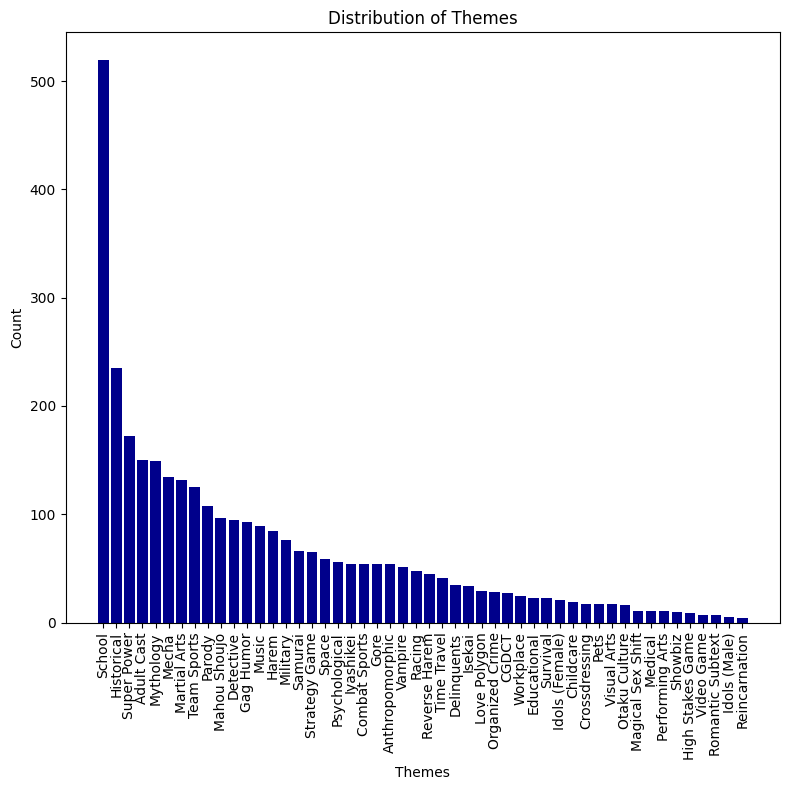

Percentage of empty themes: 12.10%


In [ ]:
all_themes = [theme for sublist in anime_df_non_null["themes"] if sublist is not None for theme in sublist]
unique_themes = set(all_themes)
unique_themes
theme_counts = {theme: all_themes.count(theme) for theme in unique_themes}

theme_counts_df = pd.DataFrame.from_dict(theme_counts, orient='index', columns=['count'])
theme_counts_df = theme_counts_df.sort_values(by='count', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(8, 8))
plt.bar(theme_counts_df.index, theme_counts_df['count'], color='darkblue')
plt.xlabel('Themes')
plt.ylabel('Count')
plt.title('Distribution of Themes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

empty_theme_percentage = (anime_df_theme['themes'].isnull().sum() / len(anime_df_theme)) * 100
print(f"Percentage of empty themes: {empty_theme_percentage:.2f}%")

In [ ]:
anime_df_theme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12226 entries, 0 to 12225
Data columns (total 93 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   anime_id                     12226 non-null  int64  
 1   name                         12226 non-null  object 
 2   type                         12201 non-null  object 
 3   episodes                     12226 non-null  object 
 4   mal_score                    11996 non-null  float64
 5   members                      12226 non-null  int64  
 6   studio                       10747 non-null  object 
 7   release-season               10747 non-null  object 
 8   release-year                 10747 non-null  float64
 9   release-date                 0 non-null      float64
 10  source-material              8527 non-null   object 
 11  genres                       10747 non-null  object 
 12  themes                       10747 non-null  object 
 13  demographics    

One hot embed Va_list

In [ ]:
import ast
from collections import Counter
anime_df1 = anime_df
anime_df1 = anime_df.dropna(subset=['va_list'])
anime_df1["va_list"]
anime_df1["va_list"] = anime_df1["va_list"].apply(ast.literal_eval)
all_list = [a for sublist in anime_df1["va_list"] for a in sublist]
genre_counts = Counter(all_list)
genre_counts_df = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['count'])
genre_counts_df = genre_counts_df.sort_values(by='count', ascending=False)
print(genre_counts_df.head(50))


                     count
Hayashibara, Megumi    311
Koyasu, Takehito       277
Kugimiya, Rie          271
Sawashiro, Miyuki      270
Hanazawa, Kana         264
Sakurai, Takahiro      260
Ishida, Akira          255
Noto, Mamiko           251
Fukuyama, Jun          251
Seki, Tomokazu         245
Miki, Shinichiro       242
Horie, Yui             238
Kawasumi, Ayako        234
Yamadera, Kouichi      231
Namikawa, Daisuke      228
Morikawa, Toshiyuki    215
Kamiya, Hiroshi        211
Fujiwara, Keiji        208
Yamaguchi, Kappei      204
Ono, Daisuke           203
Itou, Shizuka          191
Ootani, Ikue           191
Okiayu, Ryoutarou      187
Inoue, Kazuhiko        185
Inoue, Kikuko          181
Kitamura, Eri          180
Suzumura, Kenichi      178
Miyano, Mamoru         177
Hisakawa, Aya          176
Kaji, Yuuki            175
Ohara, Sayaka          173
Nakamura, Yuuichi      169
Tsuru, Hiromi          169
Saitou, Chiwa          168
Suwabe, Junichi        166
Nozawa, Masako         164
T

<ipython-input-16-ededae8fbdb0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_df1["va_list"] = anime_df1["va_list"].apply(ast.literal_eval)


In [ ]:
# Make a copy of the original DataFrame
anime_df1 = anime_df_theme.copy()

# Convert va_list strings to lists using a function that handles None gracefully
def convert_to_list(x):
    try:
        return ast.literal_eval(x)
    except (SyntaxError, ValueError):
        return []

# Apply the conversion function to va_list column
anime_df1['va_list'] = anime_df1['va_list'].apply(convert_to_list)

# Separate rows with null va_list
null_va_list_df = anime_df1[anime_df1['va_list'].apply(len) == 0]

# Separate rows with non-null va_list
not_null_va_list_df = anime_df1[anime_df1['va_list'].apply(len) > 0].copy()

# Flatten the lists and count the frequency of each voice actor in non-null va_list
all_voice_actors = [va for sublist in not_null_va_list_df['va_list'] for va in sublist]
top_voice_actors = pd.Series(all_voice_actors).value_counts().head(50).index.tolist()

# Create new columns for each top voice actor in non-null va_list and populate them
for va in top_voice_actors:
    not_null_va_list_df[f'va-{va}'] = not_null_va_list_df['va_list'].apply(lambda x: 1 if va in x else 0)

# Initialize new columns in null_va_list_df with 0 values for top voice actors
for va in top_voice_actors:
    null_va_list_df[f'va-{va}'] = 0

# Combine the DataFrames back together
anime_df_processed = pd.concat([not_null_va_list_df, null_va_list_df], ignore_index=True)

# Display the updated DataFrame
anime_df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12226 entries, 0 to 12225
Columns: 143 entries, anime_id to va-Wakamoto, Norio
dtypes: float64(6), int64(123), object(14)
memory usage: 13.3+ MB


<ipython-input-24-a734ab9e4127>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_va_list_df[f'va-{va}'] = 0
<ipython-input-24-a734ab9e4127>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_va_list_df[f'va-{va}'] = 0
<ipython-input-24-a734ab9e4127>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [ ]:
print(anime_df_processed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12226 entries, 0 to 12225
Columns: 143 entries, anime_id to va-Wakamoto, Norio
dtypes: float64(6), int64(123), object(14)
memory usage: 13.3+ MB
None


In [ ]:
import ast
from collections import Counter
anime_df1 = anime_df
anime_df1 = anime_df.dropna(subset=['staff_list'])
anime_df1["staff_list"]
anime_df1["staff_list"] = anime_df1["staff_list"].apply(ast.literal_eval)
all_list = [a for sublist in anime_df1["staff_list"] for a in sublist]
genre_counts = Counter(all_list)
genre_counts_df = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['count'])
genre_counts_df = genre_counts_df.sort_values(by='count', ascending=False)
print(genre_counts_df.head(50))

                       count
Cook, Justin             458
Iwanami, Yoshikazu       161
Mima, Masafumi           158
Tsuruoka, Youta          138
Aketagawa, Jin           129
Maruyama, Masao          119
Fujiyama, Fusanobu       110
Kananiwa, Kozue          100
Watanabe, Jun             93
Matsukura, Yuuji          88
Saitou, Shigeru           83
Fukuda, Jun               81
Urakami, Yasuo            81
Yuyama, Kunihiko          80
Yatate, Hajime            79
Maseba, Yutaka            73
Matsuura, Noriyoshi       73
Tanaka, Kazuya            70
Satou, Junichi            70
Iizuka, Kouichi           67
Shinbou, Akiyuki          66
Maruyama, Hiroo           65
Dezaki, Osamu             65
Tomino, Yoshiyuki         65
Hata, Masami              64
Kikuta, Hiromi            63
Yamauchi, Shigeyasu       61
Satomi, Tetsurou          58
Tezuka, Osamu             57
Nakatani, Toshio          57
Sasagawa, Hiroshi         56
Kobayashi, Katsuyoshi     55
Iwakami, Atsuhiro         54
Raika, Ken    

<ipython-input-20-28253c775580>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_df1["staff_list"] = anime_df1["staff_list"].apply(ast.literal_eval)


In [ ]:
import pandas as pd
import ast

# Make a copy of the original DataFrame
anime_df1 = anime_df_processed.copy()

# Convert staff_list strings to lists using a function that handles None gracefully
def convert_to_list(x):
    try:
        return ast.literal_eval(x)
    except (SyntaxError, ValueError):
        return []

# Apply the conversion function to staff_list column
anime_df1['staff_list'] = anime_df1['staff_list'].apply(convert_to_list)

# Separate rows with null staff_list
null_staff_list_df = anime_df1[anime_df1['staff_list'].apply(len) == 0]

# Separate rows with non-null staff_list
not_null_staff_list_df = anime_df1[anime_df1['staff_list'].apply(len) > 0].copy()

# Flatten the lists and count the frequency of each staff member in non-null staff_list
all_staff_members = [staff for sublist in not_null_staff_list_df['staff_list'] for staff in sublist]
top_staff_members = pd.Series(all_staff_members).value_counts().head(50).index.tolist()

# Create new columns for each top staff member in non-null staff_list and populate them
for staff in top_staff_members:
    not_null_staff_list_df[f'staff-{staff}'] = not_null_staff_list_df['staff_list'].apply(lambda x: 1 if staff in x else 0)

# Initialize new columns in null_staff_list_df with 0 values for top staff members
for staff in top_staff_members:
    null_staff_list_df[f'staff-{staff}'] = 0

# Combine the DataFrames back together
anime_df_processed1 = pd.concat([not_null_staff_list_df, null_staff_list_df], ignore_index=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12226 entries, 0 to 12225
Columns: 193 entries, anime_id to staff-Watson, Barry
dtypes: float64(6), int64(173), object(14)
memory usage: 18.0+ MB


<ipython-input-25-ee378296cb8d>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_staff_list_df[f'staff-{staff}'] = 0
<ipython-input-25-ee378296cb8d>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_staff_list_df[f'staff-{staff}'] = 0
<ipython-input-25-ee378296cb8d>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [ ]:

# Display the updated DataFrame
anime_df_processed1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12226 entries, 0 to 12225
Columns: 193 entries, anime_id to staff-Watson, Barry
dtypes: float64(6), int64(173), object(14)
memory usage: 18.0+ MB


In [ ]:
anime_df2 = anime_df_processed1
anime_df2 = anime_df2.dropna(subset=['image_url'])
anime_df2 = anime_df2.dropna(subset=['synopsis'])
anime_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11094 entries, 0 to 12225
Columns: 193 entries, anime_id to staff-Watson, Barry
dtypes: float64(6), int64(173), object(14)
memory usage: 16.4+ MB


In [ ]:
file_path = '/content/drive/My Drive/anime_df_OHE.csv'

# Assuming anime_df_merged is already created
anime_df2.to_csv(file_path, index=False)

print(f'DataFrame saved to {file_path}')

DataFrame saved to /content/drive/My Drive/anime_df_OHE.csv


## **Data Preprocessing**
### - **Checking for missing values**

In [ ]:
anime_df.isnull().sum()

anime_id                           0
name                               0
type                              25
episodes                           0
mal_score                        230
members                            0
studio                          1479
release-season                  1479
release-year                    1479
release-date                   12226
source-material                 3699
genres                          1479
themes                          1479
demographics                   10078
synopsis                        1098
image_url                       1131
rating                          1250
va_list                         1097
staff_list                      1097
recommended_review_count        1097
mixedfeelings_review_count      1097
notrecommended_review_count     1097
dtype: int64

## **Breakdown of missing values for each column**

In [ ]:
missing_values_percentage = anime_df.isnull().mean() * 100
print("Percentage of missing values for each column:")
print(missing_values_percentage)

Percentage of missing values for each column:
anime_id                         0.000000
name                             0.000000
type                             0.204482
episodes                         0.000000
mal_score                        1.881237
members                          0.000000
studio                          12.097170
release-season                  12.097170
release-year                    12.097170
release-date                   100.000000
source-material                 30.255194
genres                          12.097170
themes                          12.097170
demographics                    82.430885
synopsis                         8.980860
image_url                        9.250777
rating                          10.224113
va_list                          8.972681
staff_list                       8.972681
recommended_review_count         8.972681
mixedfeelings_review_count       8.972681
notrecommended_review_count      8.972681
dtype: float64


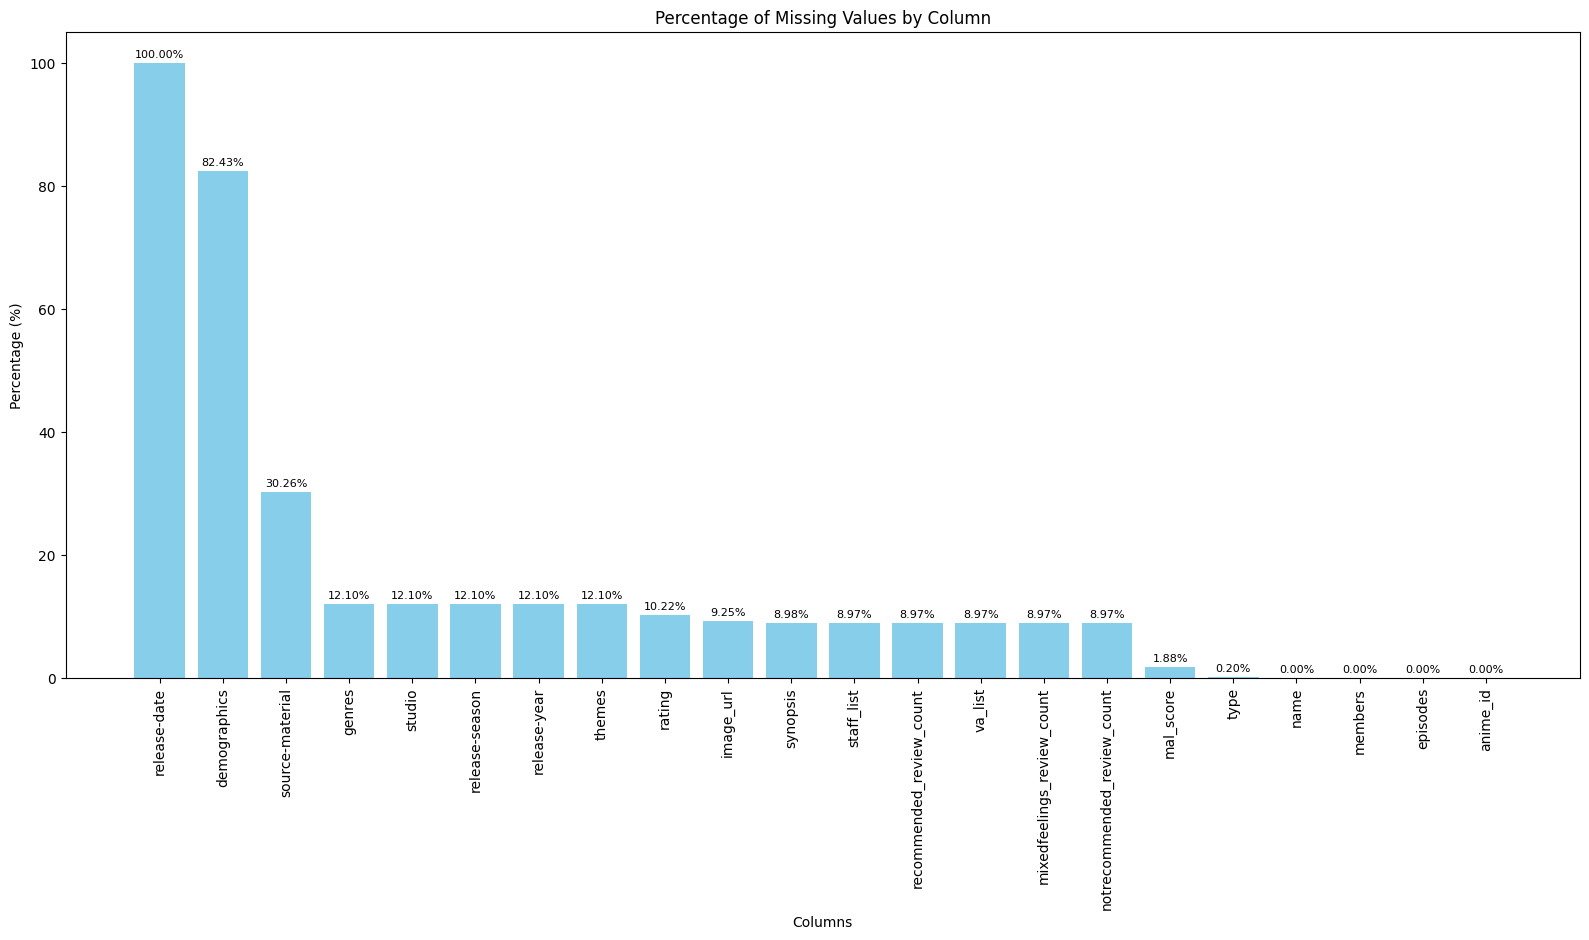

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sort the data by percentage (optional)
missing_values_percentage = missing_values_percentage.sort_values(ascending=False)


# Plotting
plt.figure(figsize=(16, 9.5))
bars = plt.bar(missing_values_percentage.index, missing_values_percentage.values, color='skyblue')

# Adding labels with percentages on top of each bar
for bar, percentage in zip(bars, missing_values_percentage.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{percentage:.2f}%',
             ha='center', va='bottom', fontsize=8, color='black')

plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## **Summary statistics for numerical columns**

In [ ]:
print("\nSummary Statistics for Anime Dataframe:")
anime_df_clean.describe()


Summary Statistics for Anime Dataframe:


,anime_id,mal_score,members,release-year,recommended_review_count,mixedfeelings_review_count,notrecommended_review_count
count,12226.000000,12226.000000,1.222600e+04,12226.000000,12226.000000,12226.000000,12226.000000
mean,14046.239653,6.477368,1.815820e+04,2003.020694,8.659414,1.977916,1.569769
std,11457.576721,1.016977,5.495978e+04,12.555121,41.082464,7.605089,7.714735
min,1.000000,1.670000,5.000000e+00,1917.000000,0.000000,0.000000,0.000000
25%,3478.250000,5.900000,2.260000e+02,1998.000000,0.000000,0.000000,0.000000
50%,10248.000000,6.570000,1.555500e+03,2006.000000,1.000000,0.000000,0.000000
75%,24792.500000,7.170000,9.490750e+03,2012.000000,3.000000,1.000000,1.000000
max,34527.000000,10.000000,1.013917e+06,2022.000000,1144.000000,349.000000,419.000000


## **Data Information**

In [ ]:
anime_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12226 entries, 0 to 12225
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   anime_id                     12226 non-null  int64  
 1   name                         12226 non-null  object 
 2   type                         12226 non-null  object 
 3   episodes                     12226 non-null  object 
 4   mal_score                    12226 non-null  float64
 5   members                      12226 non-null  int64  
 6   studio                       12226 non-null  object 
 7   release-season               12226 non-null  object 
 8   release-year                 12226 non-null  float64
 9   source-material              12226 non-null  object 
 10  genres                       12226 non-null  object 
 11  themes                       12226 non-null  object 
 12  synopsis                     12226 non-null  object 
 13  image_url       

## **Convert 'episodes' to numeric, setting errors='coerce' to handle non-numeric entries**

In [ ]:
anime_df_clean['episodes'] = pd.to_numeric(anime_df_clean['episodes'], errors='coerce')

### **Data Visualization**

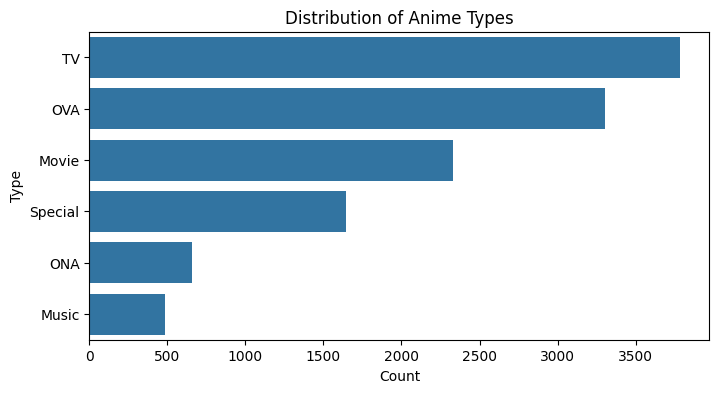

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(y='type', data=anime_df, order=anime_df['type'].value_counts().index)
plt.title('Distribution of Anime Types')
plt.xlabel('Count')
plt.ylabel('Type')
plt.show()


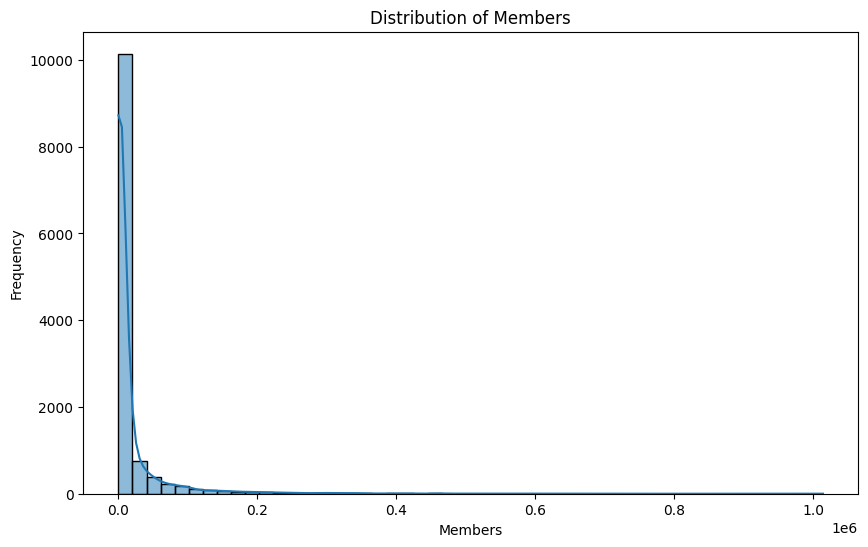

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(anime_df_clean['members'], bins=50, kde=True)
plt.title('Distribution of Members')
plt.xlabel('Members')
plt.ylabel('Frequency')
plt.show()


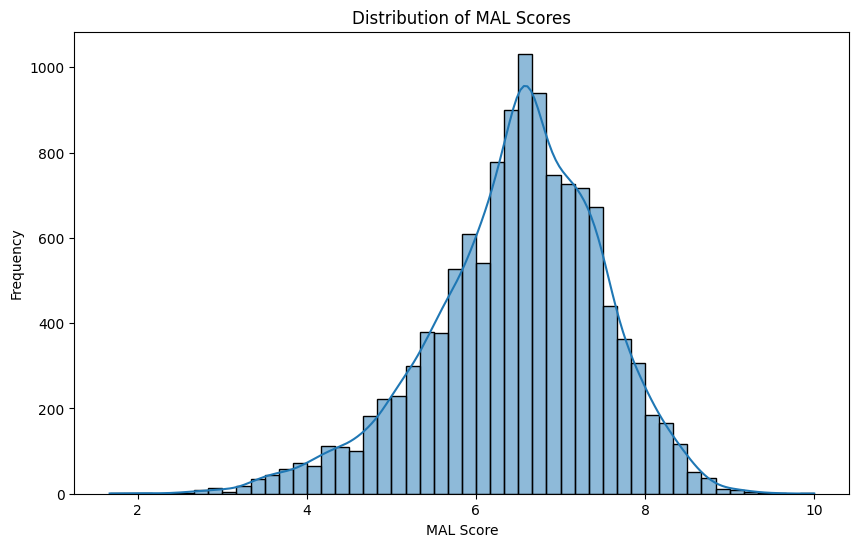

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(anime_df_clean['mal_score'], bins=50, kde=True)
plt.title('Distribution of MAL Scores')
plt.xlabel('MAL Score')
plt.ylabel('Frequency')
plt.show()


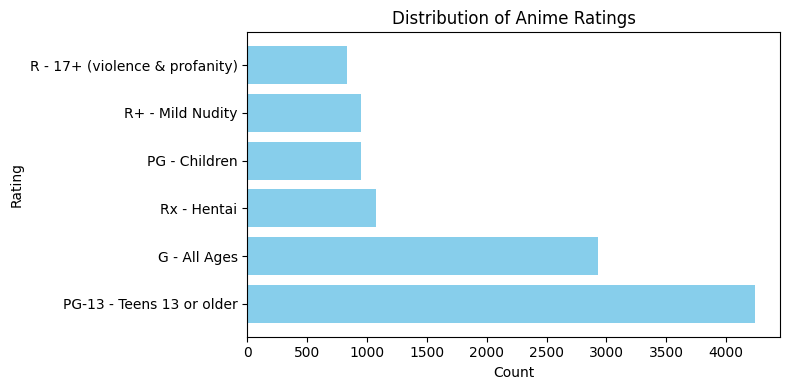

In [ ]:
rating_counts = anime_df['rating'].value_counts()

plt.figure(figsize=(8,4))
plt.barh(rating_counts.index, rating_counts.values, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.title('Distribution of Anime Ratings')
plt.tight_layout()
plt.show()

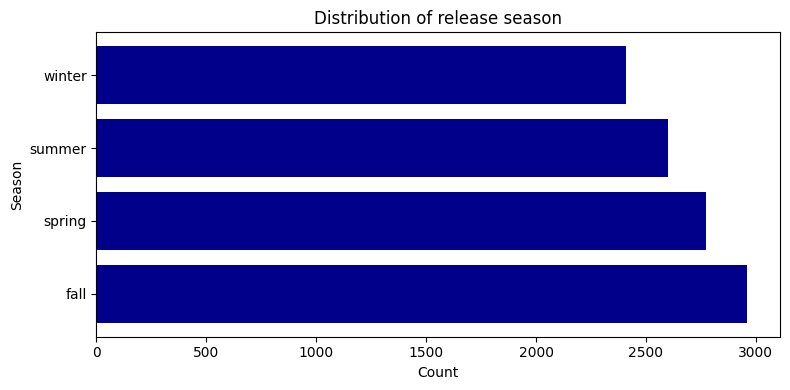

In [ ]:
rating_counts = anime_df['release-season'].value_counts()

plt.figure(figsize=(8, 4))
plt.barh(rating_counts.index, rating_counts.values, color='darkblue')
plt.xlabel('Count')
plt.ylabel('Season')
plt.title('Distribution of release season')
plt.tight_layout()
plt.show()

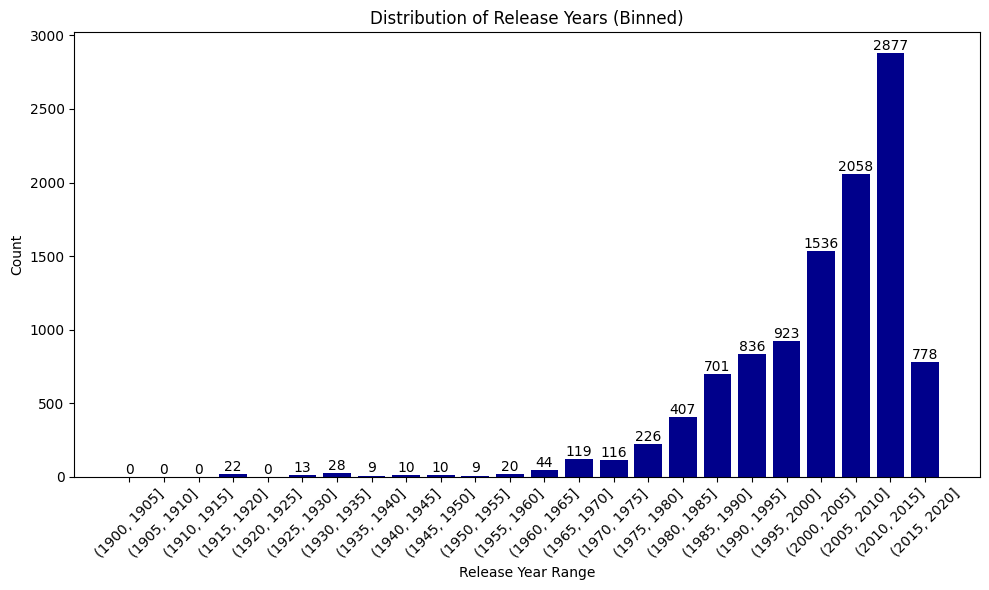

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Group the release years into bins
bins = pd.cut(anime_df['release-year'], bins=range(1900, 2025, 5))  # Adjust the range and step as needed
rating_counts = bins.value_counts().sort_index()

# Create a vertical bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(rating_counts.index.astype(str), rating_counts.values, color='darkblue')

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

# Customize the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Release Year Range')
plt.ylabel('Count')
plt.title('Distribution of Release Years (Binned)')
plt.tight_layout()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Define the file path
file_path = '/content/drive/My Drive/rating_final.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
with open(file_path, 'r') as file:
    for _ in range(5):
        print(file.readline())


user_id|anime_id|rating

1|20|-1

1|24|-1

1|79|-1

1|226|-1



In [ ]:
import pandas as pd
rating_df = pd.read_csv(file_path, delimiter='|', on_bad_lines='skip')

In [ ]:
rating_df

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7807790,73515,16512,7
7807791,73515,17187,9
7807792,73515,22145,10
7807793,73516,790,9


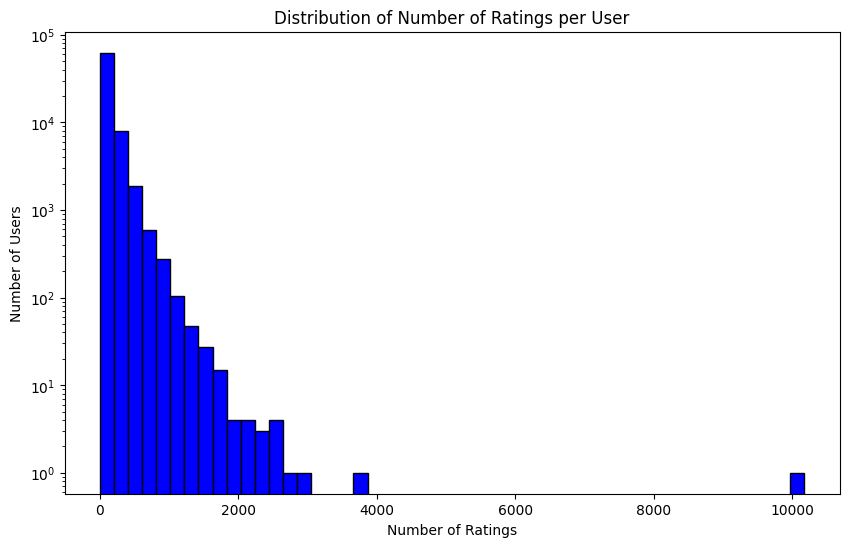

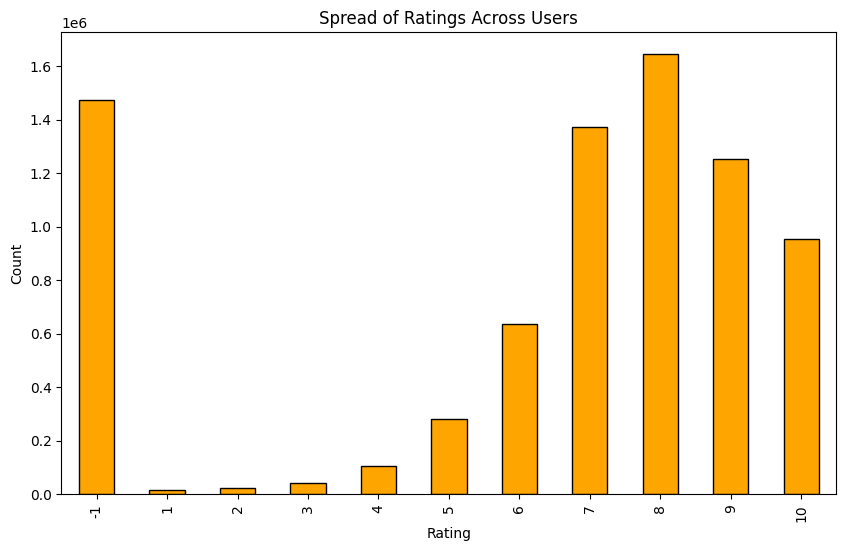

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is already loaded into the rating_df dataframe

# Distribution of Number of Ratings per User
ratings_per_user = rating_df['user_id'].value_counts()

plt.figure(figsize=(10, 6))
plt.hist(ratings_per_user, bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.yscale('log')  # Use log scale for better visibility if there's a wide range
plt.show()

# Spread of Ratings Across Users
rating_counts = rating_df['rating'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Spread of Ratings Across Users')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


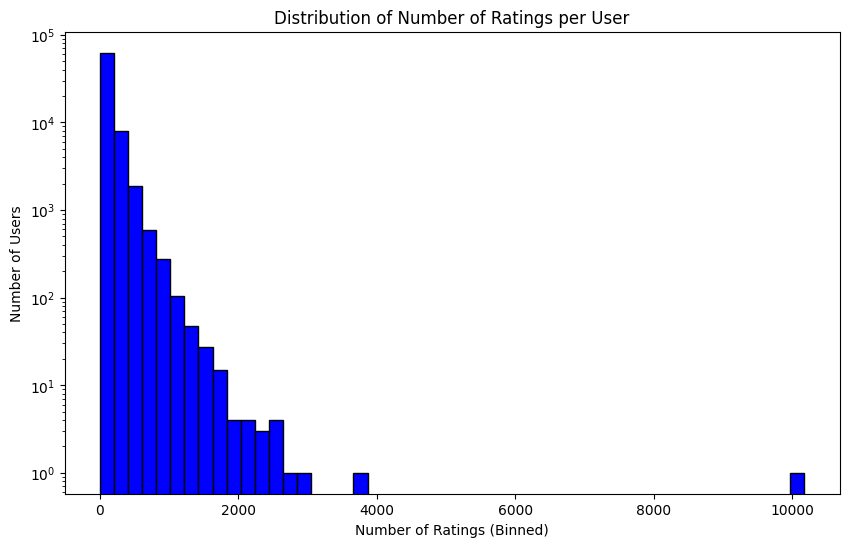

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is already loaded into the rating_df dataframe

# Distribution of Number of Ratings per User
ratings_per_user = rating_df['user_id'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.hist(ratings_per_user, bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Number of Ratings per User')
plt.xlabel('Number of Ratings (Binned)')
plt.ylabel('Number of Users')
plt.yscale('log')  # Use log scale for better visibility if there's a wide range
plt.show()